<a href="https://colab.research.google.com/github/MohamedHamdy549/CNN_Skine_Cancer/blob/main/CNN_SKINE_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import cv2
from keras.models import Sequential
import keras
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drr = r"/content/drive/MyDrive/train"
categories = ['malignant', 'benign']
img_size = 50
train_data = []

for category in categories:
  path = os.path.join(drr, category)
  class_num = categories.index(category)

  for img in os.listdir(path):
    try:
      img_arr = cv2.imread(os.path.join(path, img), 0)
      new_arr = cv2.resize(img_arr, (img_size, img_size))
      train_data.append([new_arr, class_num])
    except:
     pass


In [ ]:
x_train=[]
y_train=[]
for features, labels in train_data:
  x_train.append(features)
  y_train.append(labels)


In [ ]:
drr2 = r"/content/drive/MyDrive/test"
test_data = []

for category in categories:
  path = os.path.join(drr, category)
  class_num = categories.index(category)

  for img in os.listdir(path):
    try:
      img_arr = cv2.imread(os.path.join(path, img), 0)
      new_arr = cv2.resize(img_arr, (img_size, img_size))
      test_data.append([new_arr, class_num])
    except:
     pass


In [ ]:
x_test=[]
y_test=[]
for features, labels in train_data:
  x_test.append(features)
  y_test.append(labels)


In [ ]:
from keras.utils.np_utils import to_categorical
y_train_h = to_categorical(y_train)
y_test_h = to_categorical(y_test)

In [ ]:
X = np.array(x_train).reshape(-1, img_size, img_size, 1)
y = np.array(y_train)

X1 = np.array(x_test).reshape(-1, img_size, img_size, 1)
y1 = np.array(y_test)

In [ ]:
#with BatchNormalization
from keras.layers import BatchNormalization
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D


model = Sequential()
model.add(Conv2D(64, (3,3), padding='same', input_shape=(50, 50, 1), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Flatten()) #matrix to vector
model.add(Dense(64, activation= 'relu'))
model.add(BatchNormalization())
model.add(Dense(48, activation= 'relu'))
model.add(BatchNormalization())
model.add(Dense(12, activation= 'relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation= 'sigmoid'))


model.compile(loss='categorical_crossentropy', optimizer='adam',metrics='accuracy')

In [ ]:
model.fit(X,y ,batch_size=32, epochs=15)

Epoch 1/15
83/83 [==============================] - 2s 8ms/step - loss: 0.0000e+00 - accuracy: 0.7190
Epoch 2/15
83/83 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - accuracy: 0.7990
Epoch 3/15
83/83 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - accuracy: 0.7918
Epoch 4/15
83/83 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.8176
Epoch 5/15
83/83 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.8328
Epoch 6/15
83/83 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - accuracy: 0.8335
Epoch 7/15
83/83 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - accuracy: 0.8403
Epoch 8/15
83/83 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.8407
Epoch 9/15
83/83 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.8339
Epoch 10/15
83/83 [==============================] - 1s 7ms/step - loss: 0.0000e+0

In [ ]:
model.fit(X1,y1 ,batch_size=32, epochs=10)

Epoch 1/10
83/83 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.9147
Epoch 2/10
83/83 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.9124
Epoch 3/10
83/83 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.9291
Epoch 4/10
83/83 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.9336
Epoch 5/10
83/83 [==============================] - 1s 11ms/step - loss: 0.0000e+00 - accuracy: 0.9321
Epoch 6/10
83/83 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.9458
Epoch 7/10
83/83 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.9348
Epoch 8/10
83/83 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.9397
Epoch 9/10
83/83 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.9378
Epoch 10/10
83/83 [==============================] - 1s 7ms/step - loss: 0.0000e+

In [ ]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f47941228b0>>

In [ ]:
#import pickle
#pickle.dump(model,open('model.pkl','wb'))

In [ ]:
model.save('model.h5')
loaded_model = tf.keras.models.load_model('/content/model.h5')


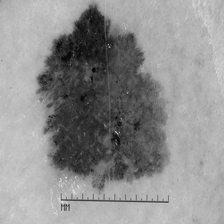

1/1 [==============================] - 0s 15ms/step
[[0.]]


In [ ]:
from tensorflow.keras.preprocessing import image
img11 = cv2.imread("/content/994.jpg", 0)
from google.colab.patches import cv2_imshow
cv2_imshow(img11)
img11 = cv2.resize(img11, (img_size, img_size))
x=image.img_to_array(img11) / 255
resized_img_np = np.expand_dims(x,axis=0)
print(model.predict(resized_img_np))
